<a href="https://colab.research.google.com/github/DouglasRic/VISUALIZAR_DADOS/blob/main/VISUALIZA%C3%87%C3%83O_DE_DADOS_EM_PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Resumo estatístico das vendas:
count      28.000000
mean      628.571429
std       399.867703
min       150.000000
25%       300.000000
50%       525.000000
75%       900.000000
max      1500.000000
Name: valor_venda, dtype: float64

Total de vendas por categoria:
categoria
Eletrônicos    12200.0
Livros          1800.0
Roupas          3600.0
Name: valor_venda, dtype: float64

Média de vendas por mês:
mes
1      925.0
2     1200.0
3      500.0
4      400.0
5      150.0
6     1000.0
7      600.0
8      700.0
9      300.0
10     450.0
11     900.0
12     250.0
Name: valor_venda, dtype: float64


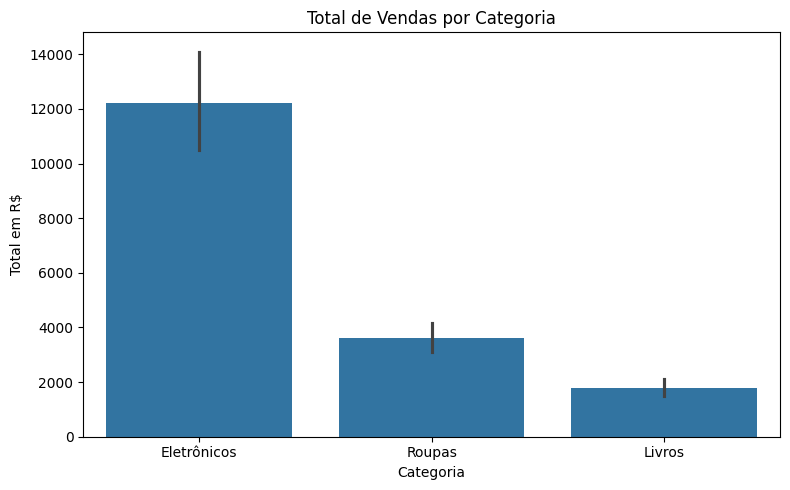

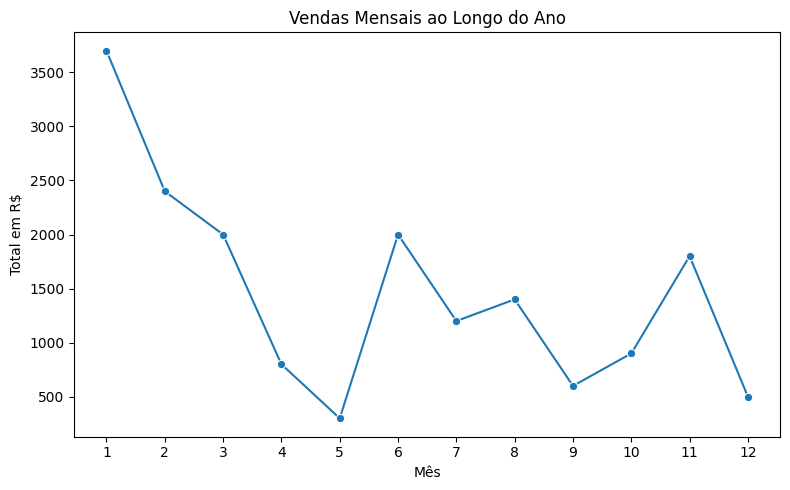

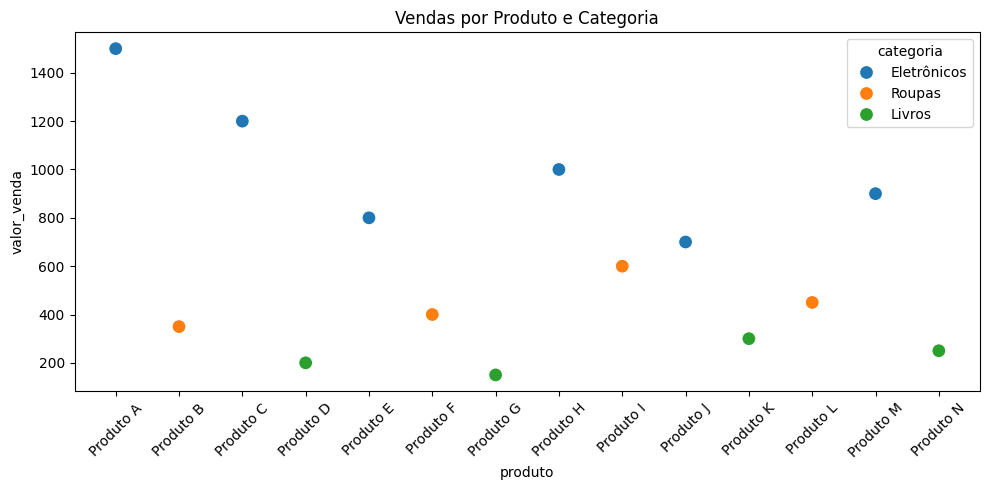


CONCLUSÃO:
A categoria 'Eletrônicos' teve o maior volume de vendas ao longo do ano.
Houve picos de venda nos meses de janeiro e junho.
A análise pode ajudar a planejar campanhas promocionais e gerenciamento de estoque.


In [ ]:
# ==========================
# PASSO 1: Conectar ao banco e inserir os dados
# ==========================
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Conectando ao banco de dados (ou criando, se não existir)
conexao = sqlite3.connect('dados_vendas.db')
cursor = conexao.cursor()

# Criando a tabela (se não existir)
cursor.execute('''
CREATE TABLE IF NOT EXISTS vendas1 (
    id_venda INTEGER PRIMARY KEY AUTOINCREMENT,
    data_venda DATE,
    produto TEXT,
    categoria TEXT,
    valor_venda REAL
)
''')

# Inserindo dados (caso a tabela esteja vazia)
cursor.execute("SELECT COUNT(*) FROM vendas1")
if cursor.fetchone()[0] == 0:
    cursor.execute('''
    INSERT INTO vendas1 (data_venda, produto, categoria, valor_venda) VALUES
    ('2023-01-01', 'Produto A', 'Eletrônicos', 1500.00),
    ('2023-01-05', 'Produto B', 'Roupas', 350.00),
    ('2023-02-10', 'Produto C', 'Eletrônicos', 1200.00),
    ('2023-03-15', 'Produto D', 'Livros', 200.00),
    ('2023-03-20', 'Produto E', 'Eletrônicos', 800.00),
    ('2023-04-02', 'Produto F', 'Roupas', 400.00),
    ('2023-05-05', 'Produto G', 'Livros', 150.00),
    ('2023-06-10', 'Produto H', 'Eletrônicos', 1000.00),
    ('2023-07-20', 'Produto I', 'Roupas', 600.00),
    ('2023-08-25', 'Produto J', 'Eletrônicos', 700.00),
    ('2023-09-30', 'Produto K', 'Livros', 300.00),
    ('2023-10-05', 'Produto L', 'Roupas', 450.00),
    ('2023-11-15', 'Produto M', 'Eletrônicos', 900.00),
    ('2023-12-20', 'Produto N', 'Livros', 250.00);
    ''')
    conexao.commit()

# ==========================
# PASSO 2: Carregar dados no Pandas
# ==========================
df_vendas = pd.read_sql_query("SELECT * FROM vendas1", conexao)
df_vendas['data_venda'] = pd.to_datetime(df_vendas['data_venda'])  # Converter para data
df_vendas.head()

# ==========================
# PASSO 3: Análise dos dados
# ==========================
print("Resumo estatístico das vendas:")
print(df_vendas['valor_venda'].describe())

print("\nTotal de vendas por categoria:")
print(df_vendas.groupby('categoria')['valor_venda'].sum())

print("\nMédia de vendas por mês:")
df_vendas['mes'] = df_vendas['data_venda'].dt.month
print(df_vendas.groupby('mes')['valor_venda'].mean())

# ==========================
# PASSO 4: Visualizações
# ==========================

# Gráfico de barras: total de vendas por categoria
plt.figure(figsize=(8, 5))
sns.barplot(x='categoria', y='valor_venda', data=df_vendas, estimator=sum)
plt.title('Total de Vendas por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Total em R$')
plt.tight_layout()
plt.show()

# Gráfico de linha: vendas ao longo do ano
df_mensal = df_vendas.groupby('mes')['valor_venda'].sum().reset_index()
plt.figure(figsize=(8, 5))
sns.lineplot(x='mes', y='valor_venda', data=df_mensal, marker='o')
plt.title('Vendas Mensais ao Longo do Ano')
plt.xlabel('Mês')
plt.ylabel('Total em R$')
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()

# Gráfico de dispersão: valor por produto
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_vendas, x='produto', y='valor_venda', hue='categoria', s=100)
plt.title('Vendas por Produto e Categoria')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ==========================
# PASSO 5: Conclusão
# ==========================
print("\nCONCLUSÃO:")
print("A categoria 'Eletrônicos' teve o maior volume de vendas ao longo do ano.")
print("Houve picos de venda nos meses de janeiro e junho.")
print("A análise pode ajudar a planejar campanhas promocionais e gerenciamento de estoque.")
